In [64]:
# Add matplotlib inline magic
%matplotlib inline

# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os

In [65]:
to_load_city_data = os.path.join("Resources","city_data.csv")
to_load_ride_data = os.path.join("Resources","ride_data.csv")

In [66]:
# read the city data and file and store in a pandas DataFrame
city_data_df = pd.read_csv(to_load_city_data)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [67]:
# Read the ride data and file and store in a pandas DataFrame
ride_data_df = pd.read_csv(to_load_ride_data)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [68]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [69]:
# Get the columns and and check for nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [70]:
# Check data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [71]:
# Get the unique value of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [72]:
# get the number of data points from the Urban cities
sum(city_data_df["type"] == "Rural")

18

In [73]:
# Get the ride_data columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [74]:
# Check how many rows are nnull
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [75]:
# Check data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [76]:
# Combine data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city","city"])

# Display DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [77]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [78]:
# Create the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [79]:
# Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [80]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [81]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [82]:
# Get the number of rides for urban cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [83]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [84]:
# Get average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [85]:
# Get average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [86]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [87]:
# Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [88]:
# Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

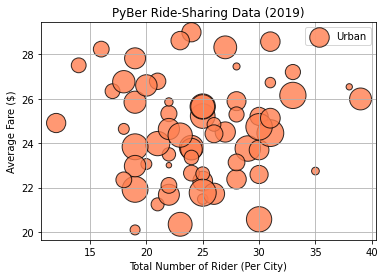

In [89]:
# Build the scatter plots for the urban cities
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, label="Urban", alpha =0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.grid()
plt.legend()

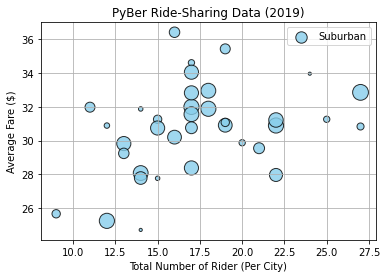

In [90]:
# Build the scatter plots for the suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidths=1, label="Suburban", alpha =0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.grid()
plt.legend()

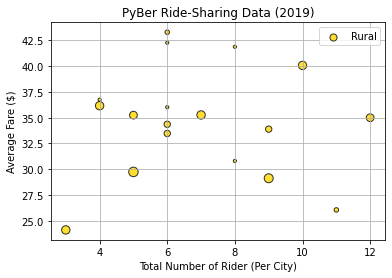

In [91]:
# Build the scatter plots for the rural cities
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidths=1, label="Rural", alpha =0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.grid()
plt.legend()

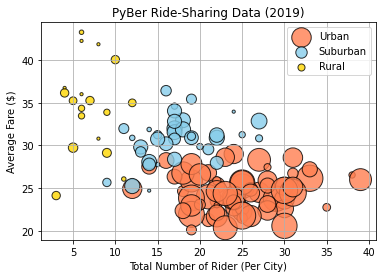

In [92]:
# Urban cities scatter
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, label="Urban", alpha =0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.grid()
plt.legend()

# Suburban cities scatter
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidths=1, label="Suburban", alpha =0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.grid()
plt.legend()

# Rural cities scatter
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidths=1, label="Rural", alpha =0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.grid()
plt.legend()

# Show the compiled plot
plt.show()

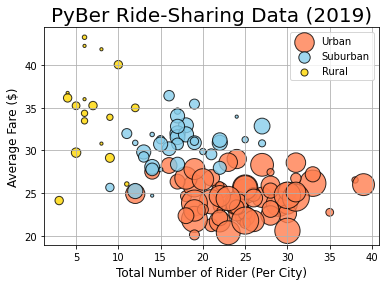

In [93]:
# Urban cities scatter
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, label="Urban", alpha =0.8)


# Suburban cities scatter
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidths=1, label="Suburban", alpha =0.8)


# Rural cities scatter
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidths=1, label="Rural", alpha =0.8)


# Incorprate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rider (Per City)", fontsize=12)
plt.grid(True)

# Add Legend
plt.legend()

# Show the compiled plot
plt.show()

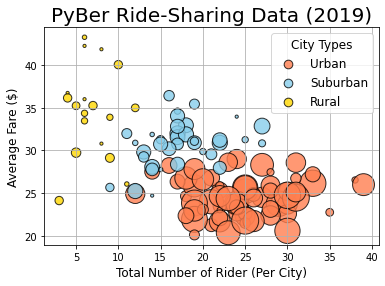

In [94]:
# Adjust legend 

# Urban cities scatter
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, label="Urban", alpha =0.8)


# Suburban cities scatter
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidths=1, label="Suburban", alpha =0.8)


# Rural cities scatter
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidths=1, label="Rural", alpha =0.8)


# Incorprate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rider (Per City)", fontsize=12)
plt.grid(True)

# Add Legend
lgnd = plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Show the compiled plot
plt.show()

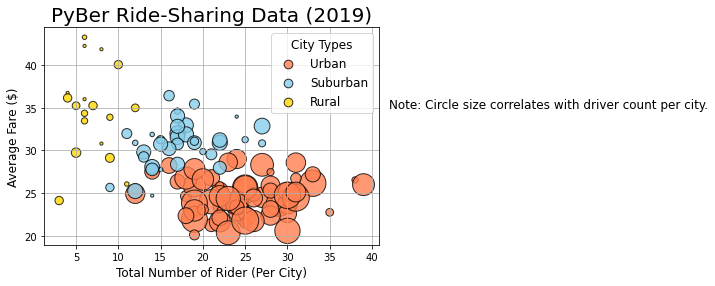

In [95]:
# Add note after legend

# Urban cities scatter
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, label="Urban", alpha =0.8)


# Suburban cities scatter
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidths=1, label="Suburban", alpha =0.8)


# Rural cities scatter
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidths=1, label="Rural", alpha =0.8)


# Incorprate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rider (Per City)", fontsize=12)
plt.grid(True)

# Add Legend
lgnd = plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incoroporate a text label about circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the compiled plot
plt.show()

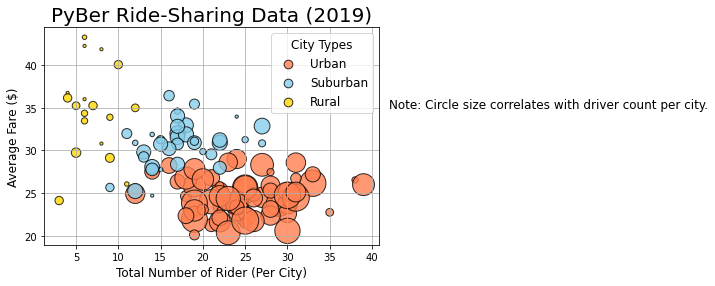

In [96]:
# Add save figure code after plt.text

# Urban cities scatter
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, c='coral', edgecolor='black', linewidths=1, label="Urban", alpha =0.8)


# Suburban cities scatter
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count, c='skyblue', edgecolor='black', linewidths=1, label="Suburban", alpha =0.8)


# Rural cities scatter
plt.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, c='gold', edgecolor='black', linewidths=1, label="Rural", alpha =0.8)


# Incorprate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rider (Per City)", fontsize=12)
plt.grid(True)

# Add Legend
lgnd = plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incoroporate a text label about circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show the compiled plot
plt.show()

In [97]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [98]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [99]:
# Get summary statistics
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [100]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [101]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [102]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [103]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [104]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [105]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [106]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [107]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [108]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [109]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [110]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [111]:
# Calculate themeasures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for the urban trips is ${mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for the urban trips is ${median_urban_fares :.2f}')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare rpice for urban trips is {mode_urban_fares}')

The mean fare price for the urban trips is $24.53
The median fare price for the urban trips is $24.64
The mode fare rpice for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [112]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [113]:
# Calculate themeasures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for the suburban trips is ${mean_suburban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for the suburban trips is ${median_suburban_fares :.2f}')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare rpice for suburban trips is {mode_suburban_fares}')

The mean fare price for the suburban trips is $30.97
The median fare price for the suburban trips is $30.75
The mode fare rpice for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [114]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [115]:
# Calculate the measures of central tendency for the average fare for rural cities
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare prices for rural cities is ${mean_rural_fares:.2f}')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural cities is ${median_rural_fares:.2f}')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural cities is {mode_rural_fares}')

The mean fare prices for rural cities is $34.62
The median fare price for rural cities is $37.05
The mode fare price for rural cities is ModeResult(mode=array([37.05]), count=array([2]))


In [116]:
# Get the driver count for urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [117]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f'Mean:{mean_urban_drivers:.2f},\nMedian:{median_urban_drivers:.2f},\nMode:{mode_urban_drivers}')

Mean:36.68,
Median:37.00,
Mode:ModeResult(mode=array([39]), count=array([86]))


In [118]:
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [119]:
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f'Mean:{mean_suburban_drivers:.2f},\nMedian:{median_suburban_drivers:.2f},\nMode:{mode_suburban_drivers}')

Mean:13.71,
Median:16.00,
Mode:ModeResult(mode=array([20]), count=array([79]))


In [120]:
rural_drivers= rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [121]:
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f'Mean:{mean_rural_drivers:.2f},\nMedian:{median_rural_drivers:.2f},\nMode:{mode_rural_drivers}')

Mean:4.30,
Median:4.00,
Mode:ModeResult(mode=array([1]), count=array([32]))


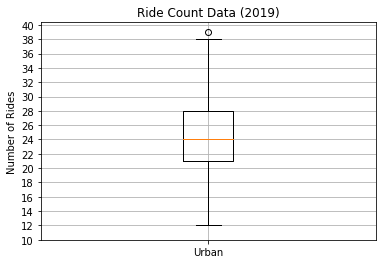

In [122]:
# Box and whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

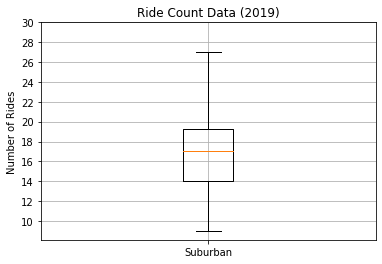

In [123]:
# Box and whisker for suburban
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,31,step=2.0))
ax.grid()
plt.show()

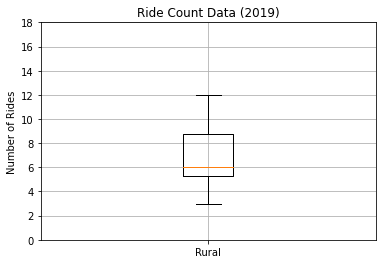

In [124]:
# Box and whisker for suburban
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,20,step=2.0))
ax.grid()
plt.show()

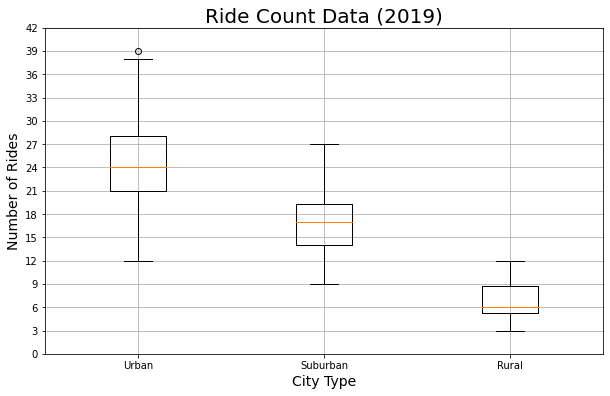

In [125]:
# Add all ride count box-and-whisker plots to the same graph

x_labels = ["Urban",'Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")

plt.show()

In [126]:
# Get the city that matches 39 riders
urbany_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urbany_city_outlier} has the highest rider count')

West Angela has the highest rider count


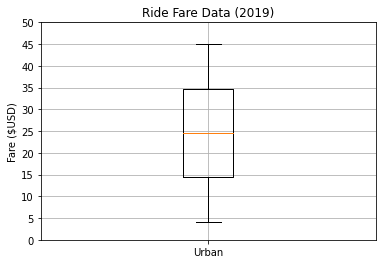

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [128]:
# box-and-whisker plot for urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

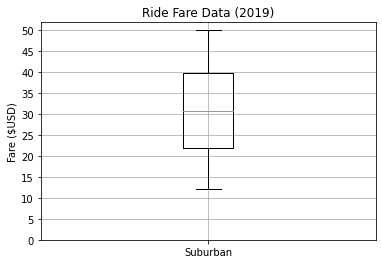

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [129]:
# box-and-whisker plot for suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,5))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

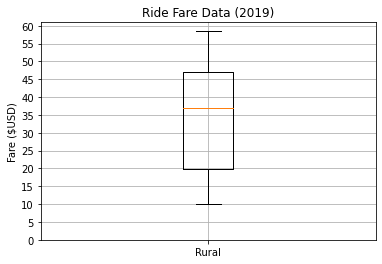

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [133]:
# Creata a box-and-whisker plot for rural fare data
x_labels=["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,61,5))
plt.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

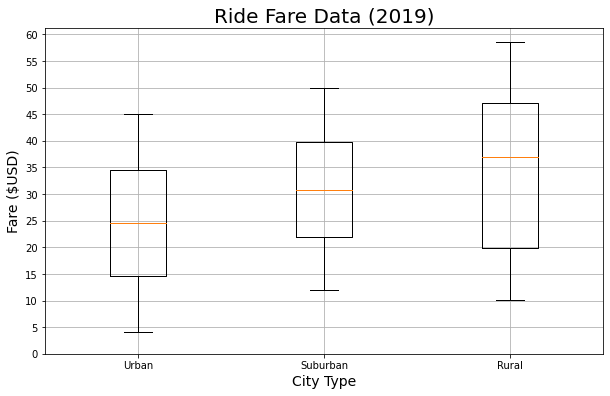

In [136]:
# Create a box-and-whisker plot to plot all 3 city types on one graph
x_labels = ["Urban","Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig,ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data,labels=x_labels)
ax.set_title("Ride Fare Data (2019)",fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize =14)
ax.set_xlabel("City Type",fontsize=14)
ax.set_yticks(np.arange(0,61,5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig3.png")

plt.show()

